In [1]:
import numpy as np

In [2]:
import sys, glob

In [3]:
import matplotlib.pyplot as plt

In [4]:
from pycurrents.adcp.rdiraw import Multiread

In [11]:
import jdcal

In [12]:
import datetime

In [5]:
%matplotlib inline

In [171]:
pname = '/Volumes/wjlee_apl_2/2017_cruises/ADCP_RR1713/raw/os150/'
fname = glob.glob(pname+'rr2017_208_*.raw')
fname

['/Volumes/wjlee_apl_2/2017_cruises/ADCP_RR1713/raw/os150/rr2017_208_65011.raw',
 '/Volumes/wjlee_apl_2/2017_cruises/ADCP_RR1713/raw/os150/rr2017_208_72000.raw',
 '/Volumes/wjlee_apl_2/2017_cruises/ADCP_RR1713/raw/os150/rr2017_208_79200.raw']

In [172]:
m=Multiread(fname,'os')

In [173]:
data=m.read()

In [174]:
data.pingtype

'bb'

In [175]:
m.list_configs()

# index (ping, NCells, CellSize, Blank, Pulse) nfiles
0    (bb, 80, 4.0, 4.0, 4.0)     3
1    (nb, 60, 8.0, 4.0, 8.0)     3


## Function to convert timestamp

In [176]:
def dday2timestr(yr,dday):
    ''' 
    Convert dday to str of timestamp
    yr     data.yearbase
    dday   one or more items in a list from data.dday
    '''
    yr1day = jdcal.gcal2jd(yr,1,1)  # get numbers for start of the year
    gcal = [jdcal.jd2gcal(yr1day[0],yr1day[1]+x) for x in np.nditer(dday)]
    td = [datetime.datetime(year=xx[0],month=xx[1],day=xx[2])+datetime.timedelta(days=xx[-1]) for xx in gcal]
    return [x.strftime('%H:%M:%S') for x in td]

### Make xtick labels

In [177]:
ping_jump = 2000
xx_pingtime = data.dday[::ping_jump]  # every 1000th ping
xx_ticklabel = dday2timestr(data.yearbase,xx_pingtime)

### Plot raw amplitude using correct axes

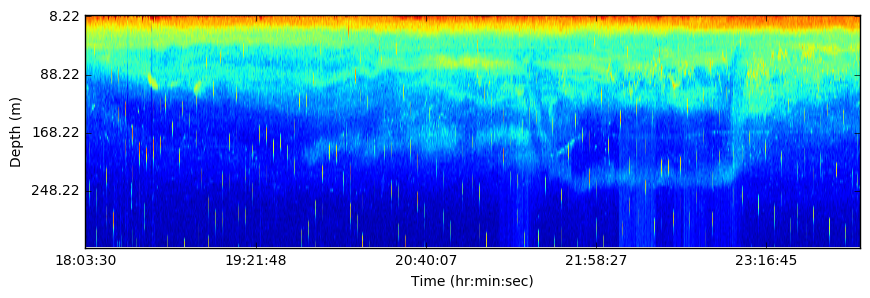

In [178]:
plt.figure(figsize=(10,3))
plt.imshow(data.amp1.T,aspect='auto')
plt.xticks(range(0,data.amp1.shape[0],ping_jump),xx_ticklabel)
plt.yticks(range(0,data.amp1.shape[1],20),data.dep[::20])
plt.xlabel('Time (hr:min:sec)')
plt.ylabel('Depth (m)')

## Check transmission loss

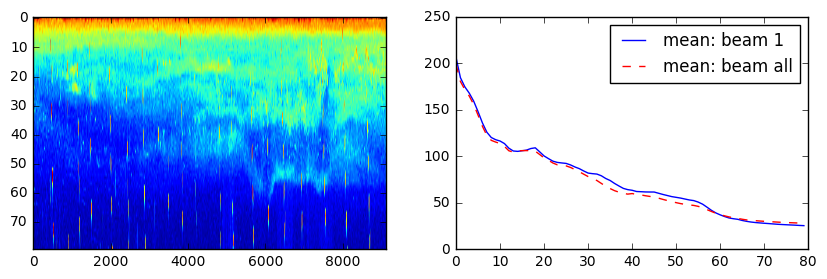

In [179]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.imshow(data.amp[:,:,1].T,aspect='auto')
plt.subplot(122)
plt.plot(np.mean(data.amp[:,:,1],axis=0),label='mean: beam 1')
plt.plot(np.mean(data.amp,axis=(0,2)),'r--',label='mean: beam all')
plt.legend()

## Experiment with compensating for TL

In [180]:
r = data.dep/np.cos(m.sysconfig['angle']*np.pi/180)
TL = 20*np.log10(r)
alpha = 100
A = 2*alpha*r/1000

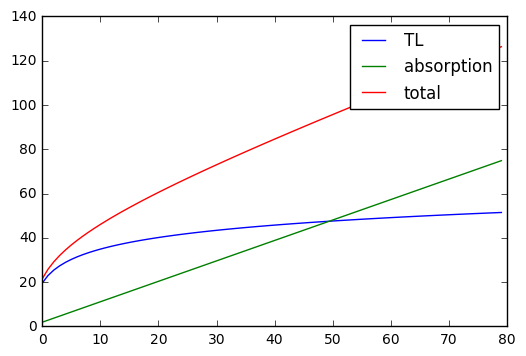

In [181]:
plt.plot(TL,label='TL')
plt.plot(A,label='absorption')
plt.plot(TL+A,'r',label='total')
plt.legend()

## Compare different compensation

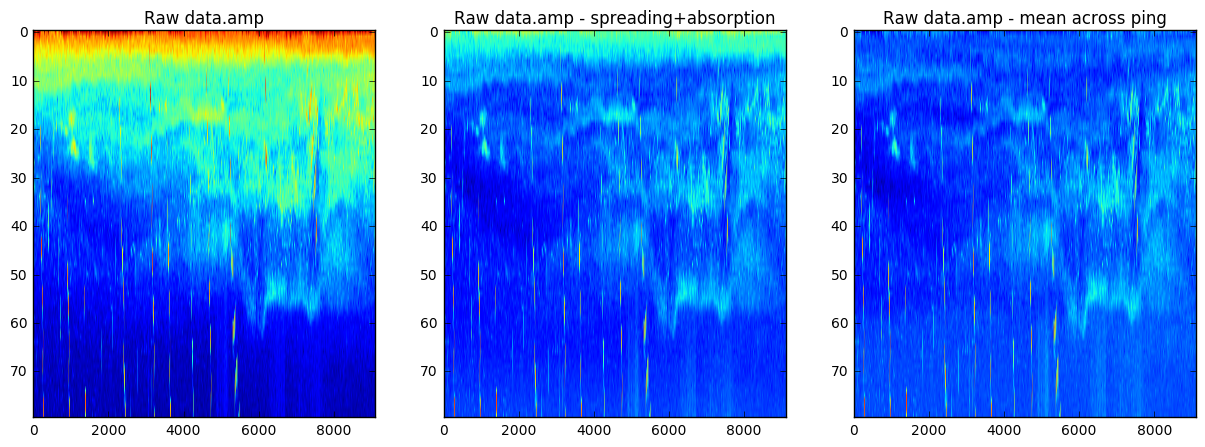

In [182]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(data.amp[:,:,1].T,aspect='auto')
plt.title('Raw data.amp')
plt.subplot(132)
plt.imshow((data.amp[:,:,1]+TL+A).T,aspect='auto')
plt.title('Raw data.amp - spreading+absorption')
plt.subplot(133)
plt.imshow((data.amp[:,:,1]-np.mean(data.amp[:,:,1],axis=0)).T,aspect='auto')
plt.title('Raw data.amp - mean across ping')

In [183]:
m.sysconfig['angle']

30

## Test running average of TL trend

In [184]:
import pandas as pd

In [185]:
run_mean = pd.rolling_mean(data.amp1[:,50])

TypeError: f() takes at least 2 arguments (1 given)

In [137]:
data.amp1.shape

(33103, 80)